# Complex functions

In [1]:
using PyPlot
using PyCall
@pyimport numpy.ma as ma

# simple flat plot
function Plot(f, x)
    fx=[f(xi) for xi in x]
    plot(x, fx)
end

# plot of function of 2 variables, 3D plot
function Plot(f, x, y)
    fx=[[xi, yi, f(xi,yi)] for xi in x for yi in y]
    surf([fxi[1] for fxi in fx], [fxi[2] for fxi in fx], [fxi[3] for fxi in fx])
end

# plot of function of 2 variables, color-codded
function DensityPlot(f, x, y)
    xy = [[xi, yi] for xi in x, yi in y]
    zv = [f((xy[i,j][1]+xy[i+1,j+1][1])/2.,
            (xy[i,j][2]+xy[i+1,j+1][2])/2.) for i in 1:(size(xy,1)-1), j in 1:(size(xy,2)-1)]
    zvmask = pycall(ma.array, Any, zv, mask=isnan.(zv))
    xv = [xy[i,j][1] for i in 1:size(xy,1), j in 1:size(xy,2)]
    yv = [xy[i,j][2] for i in 1:size(xy,1), j in 1:size(xy,2)]
    pcolor(xv, yv, zvmask)
end

DensityPlot (generic function with 1 method)

## Rotation of the sqrt-cut

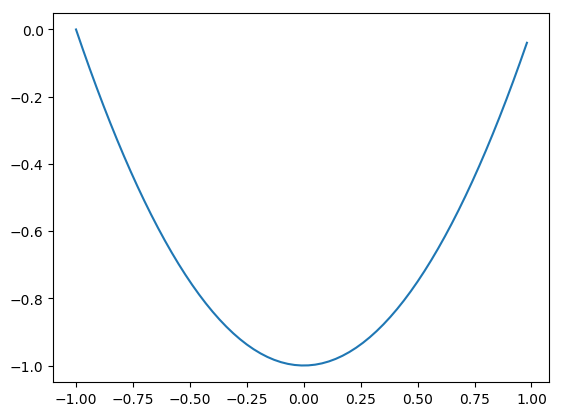

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f61d2209990>

In [12]:
Plot(x->x^2-1,-1:0.03:1)

$$
\sqrt{x} = \sqrt{x e^{-i\phi}}\,e^{i\phi/2}
$$

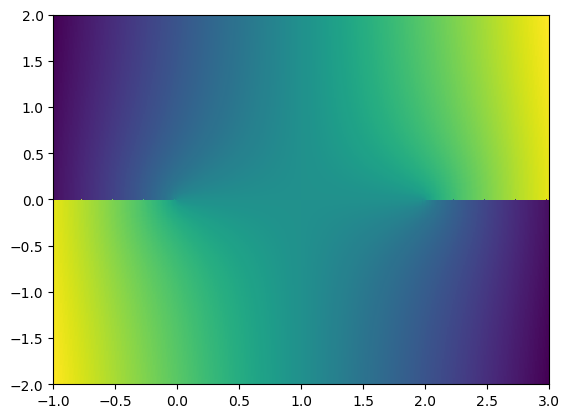

PyObject <matplotlib.collections.PolyCollection object at 0x7f61d214f110>

In [13]:
# function for the rotated sqrt
sqrtRot(x,ϕ) = sqrt(exp(-1im*ϕ)*x)*exp(1im*ϕ/2.)

DensityPlot(-1:0.01:3, -2:0.01:2) do x, y
    ϕ = π
    z = x+1im*y
    f = sqrtRot(z*(z-2),ϕ)
    return real(f)
end

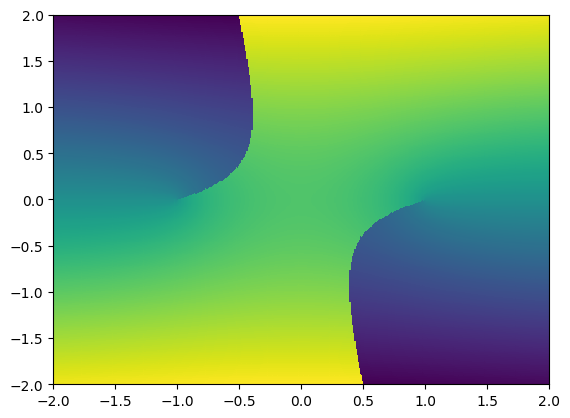

PyObject <matplotlib.collections.PolyCollection object at 0x7f61e64c4210>

In [6]:
DensityPlot(-2:0.01:2, -2:0.01:2) do x, y
    ϕ = 0.4
    z = x+1im*y
    f = sqrtRot(z^2-1,ϕ)
    return imag(f)
end